(303, 14)
Visão geral dos dados:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  

Valores categóricos contidos no atributo thal:
['fixed' 'normal' 'reversible' '1' '2']

Visualização dos valores no atributo thal:


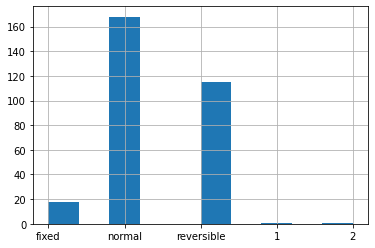

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# vamos estudar o Cleveland Clinic Foundation for Heart Disease dataset
data = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/heart.csv")
print(data.shape)

print("Visão geral dos dados:")
print(data.head())

print("\nValores categóricos contidos no atributo thal:")
print(data['thal'].unique())

print("\nVisualização dos valores no atributo thal:")
data['thal'].hist()
plt.show()

(301, 14)

Valores categóricos contidos no atributo thal:
['fixed' 'normal' 'reversible']

Visualização dos valores no atributo thal:


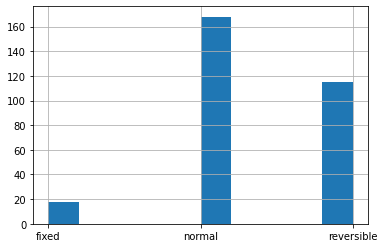

In [14]:
# aparentemente instâncias com valores '1' e '2' são discrepantes
data = data[(data['thal']!='1')&(data['thal']!='2')]
print(data.shape)

print("\nValores categóricos contidos no atributo thal:")
print(data['thal'].unique())

print("\nVisualização dos valores no atributo thal:")
data['thal'].hist()
plt.show()

In [15]:
# o método get_dummies faz esta configuração para nós:
dummy_vars = pd.get_dummies(data['thal'])
newData = pd.concat([data['thal'], dummy_vars], axis=1, sort=False)
print(newData)

           thal  fixed  normal  reversible
0         fixed      1       0           0
1        normal      0       1           0
2    reversible      0       0           1
3        normal      0       1           0
4        normal      0       1           0
..          ...    ...     ...         ...
298       fixed      1       0           0
299  reversible      0       0           1
300  reversible      0       0           1
301  reversible      0       0           1
302  reversible      0       0           1

[301 rows x 4 columns]


In [16]:
del data['thal']
data = pd.merge(data, newData, left_index=True, right_index=True)
del data['thal']
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  target  fixed  normal  reversible  
0   0       0      1       0           0  
1   3       1      0       1           0  
2   2       0      0       0           1  
3   0       0      0       1           0  
4   0       0      0       1           0  


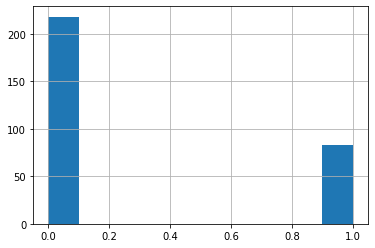

In [17]:
data['target'].hist()
plt.show()

In [18]:
print(data.shape)
Y = data['target']
del data['target']
X = data

print(X.shape)
print(Y.shape)

(301, 16)
(301, 15)
(301,)


In [19]:
print(X.head())
print(Y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  fixed  normal  reversible  
0   0      1       0           0  
1   3      0       1           0  
2   2      0       0           1  
3   0      0       1           0  
4   0      0       1           0  
0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64


In [20]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

#definição do cross-validation
numeroFolds = 5
kf = KFold(n_splits=numeroFolds, shuffle=True)

#definição dos classificadores
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC(kernel='linear')
nb = GaussianNB()

#classificação do conjunto IRIS
scores = cross_val_score(knn, X, Y, cv=kf)
print('Acurácia com K-NN: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
scores = cross_val_score(svm, X, Y, cv=kf)
print('Acurácia com SVM: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))
scores = cross_val_score(nb, X, Y, cv=kf)
print('Acurácia com NB: %0.4f +/- %0.4f\n' % (scores.mean(), scores.std()))

Acurácia com K-NN: 0.6879 +/- 0.0561
Acurácia com SVM: 0.8407 +/- 0.0215
Acurácia com NB: 0.8437 +/- 0.0504

